In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
def get_dir(d):
    '''
        d : string of a directory name. eg.: './' or './input_dir/'
        returns: list of the sub directories in the parameter d
    '''
    names_directory = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]
    return names_directory

In [4]:
def get_files(d):
    return os.listdir(d)

In [5]:
def get_images(path):
    return [mpimg.imread(i) for i in path]

In [6]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(12,12))
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [43]:
n = []
directory_name = './out_dir/'
d = get_dir(directory_name)
for i in d:
    k = get_files(i)
    for j in k:
        n.append([directory_name, i[len(directory_name):]+'/', j])

In [44]:
df = pd.DataFrame(columns=['directory', 'name', 'photo'])

In [45]:
df = pd.DataFrame()
for i in n:
    df = df.append({'directory':i[0], 'name':i[1], 'photo':i[2]}, ignore_index=True)
print(df.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(df)


(476, 3)
      directory                 name                       photo
0    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115105.png
1    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115107.png
2    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115109.png
3    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115110.png
4    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115112.png
5    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115114.png
6    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115115.png
7    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115116.png
8    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115118.png
9    ./out_dir/    Aashutosh_Ranjan/     IMG_20180423_115120.png
10   ./out_dir/        Ajay_Bundela/     IMG_20180423_112414.png
11   ./out_dir/        Ajay_Bundela/     IMG_20180423_112416.png
12   ./out_dir/        Ajay_Bundela/     IMG_20180423_112421.png
13   ./out_dir/        Ajay_Bundela/     IMG_20180423_112424.png
14   ./out_dir/ 

In [64]:
directory_name = './out_dir/'
def print_images(name):
    images = get_files(directory_name+name)
    z = [directory_name+name+'/'+i for i in images]
    z = get_images(z)
    show_images(z)

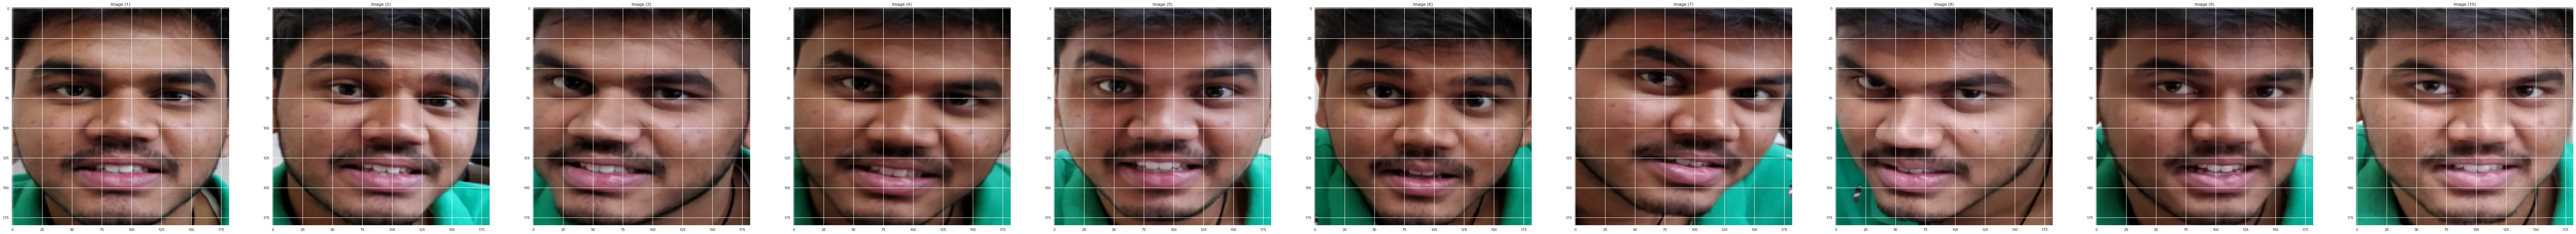

In [65]:
print_images('vishal_singh')

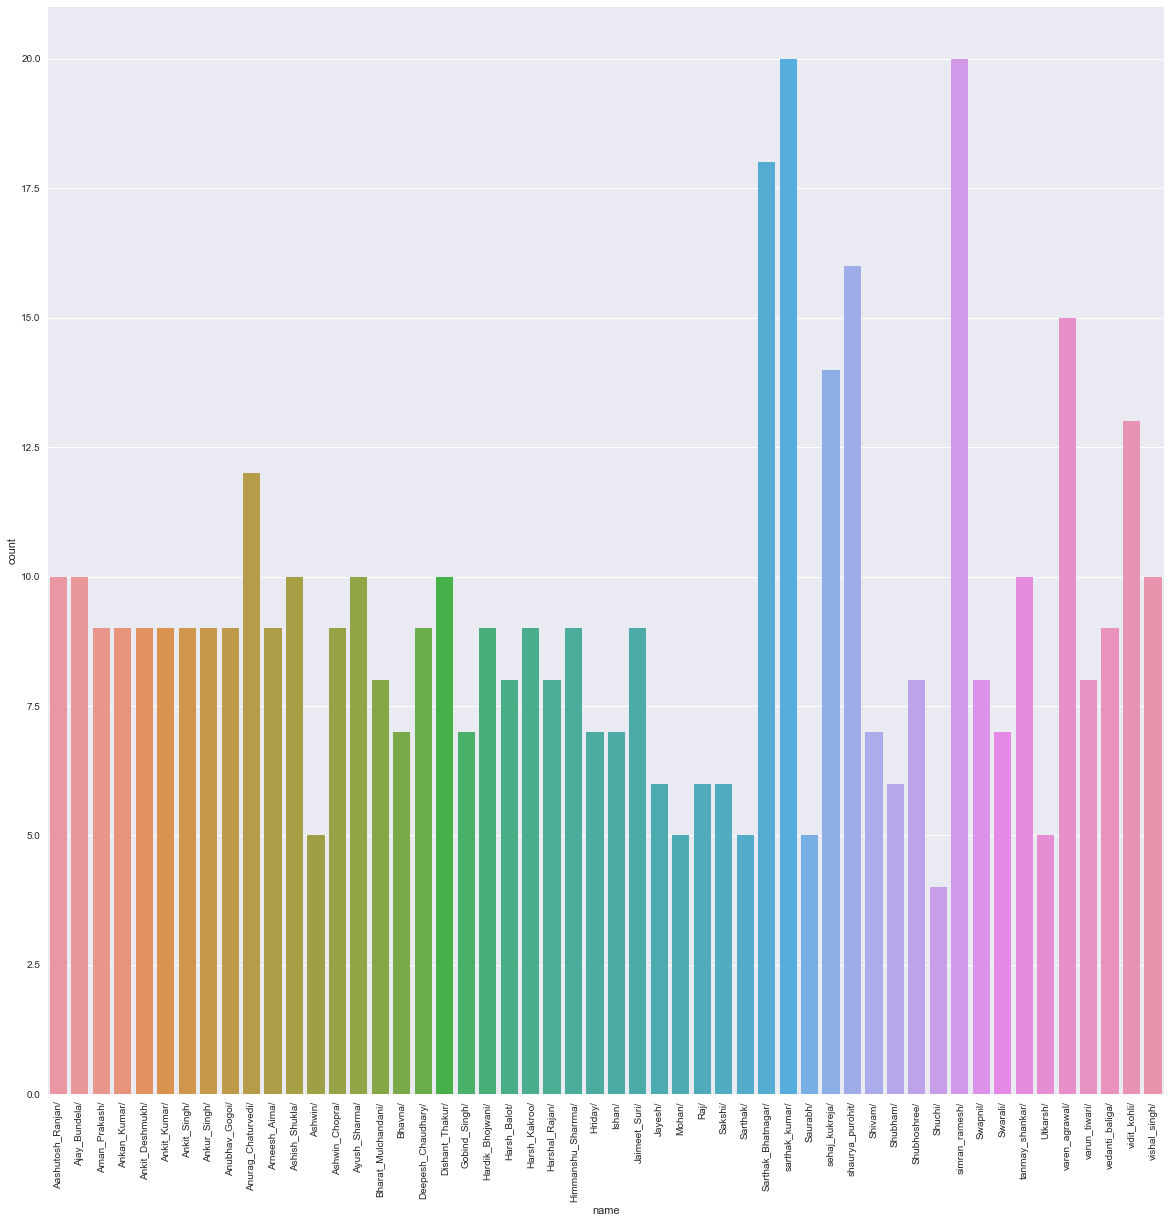

In [62]:
import seaborn as sns
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
ax = sns.countplot(x='name', data=df)
